# Migration datasets explorations part 2: the sample and comparison with the images sets

## Next step: comparison with the sample 

Now we read in the sample ('steekproef') for comparison. It consists of a number of worksheets in an excel file, so we have to do some pandas tricks to make this work

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
steekproef = pd.ExcelFile("/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/migrant_steekproef_masterdb_20180629.xlsx")
steekproef.sheet_names

['emmigrantunits',
 'emcards',
 'emtravels',
 'emwaardeoordeels',
 'emimages',
 'emevents',
 'emactors',
 'emactorinstitutions',
 'lookup_instellingen',
 'emeventtypes',
 'emcardcatalogs',
 'emconsulates',
 'emvervoermiddels',
 'emtypevervoers',
 'emschemas',
 'emlocations',
 'emreligions',
 'orig',
 'reserve']

In [4]:
units = steekproef.parse('emmigrantunits')

units = units.drop(units.index[:2]) # kick out rows with legacy stuff

units.columns


Index(['persoonsId', 'initialen', 'tussenvoegsel', 'achternaam',
       'geboortejaar', 'hasBirthPlace', 'hasResidenceLocation', 'hasSchema',
       'hasUnit', 'samenstelling', 'geslacht', 'hasReligion', 'adresAantal',
       'eventsAantal', 'is_duplicaat',
       'duplicaten bevatten afwijkende gegevens', 'Heeft geen correct id'],
      dtype='object')

In [5]:
# but we do not need all units data here

units_select = units.drop(['eventsAantal', 'is_duplicaat',
       'duplicaten bevatten afwijkende gegevens', 'Heeft geen correct id'], axis=1)

units_select.head()

,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,geslacht,hasReligion,adresAantal
134,34120.0,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,6,Gezin,NaN,RK,3
295,46567.0,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,1,Alleen,Man,RK,1
403,3053.0,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,NaN,RK,2
439,5515.0,L.F.,van,Esseveld,1892,Oosbaan,Alkmaar,LP,2,Echtpaar,NaN,NH,4
58,27092.0,G.,de,Kroon,1916,NaN,Alkmaar,NGSS,6,Gezin,NaN,Geref.,1


In [6]:
# but we also need travel dates

travels = steekproef.parse('emtravels')
travels = travels.drop(travels.index[:3])
travels = travels.drop(['aq','as','(k)','(L)'], axis=1)
travels = travels.rename(columns={'ar':'year', '(c)':'migrantid'})
travels.head()

,year,migrantid
4,0,23521
8,1954,23805
66,0,27617
72,0,27997
73,0,27997


In [7]:
tdf = pd.pivot_table(travels, values=['migrantid'], index=travels.year, aggfunc='count')
tdf['% of Total'] = (tdf.migrantid/ tdf.migrantid.sum() * 100).round(decimals=1)
tdf

,migrantid,% of Total
year,,
0,82,14.1
1946,1,0.2
1948,1,0.2
1949,1,0.2
1950,8,1.4
1951,15,2.6
1952,18,3.1
1953,10,1.7
1954,22,3.8


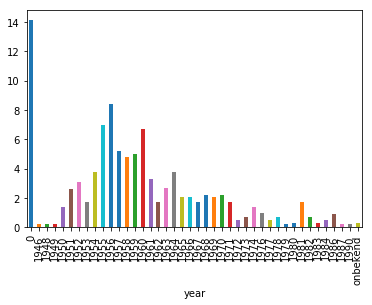

In [8]:
# a quick plot

tdf["% of Total"].plot(kind="bar")

TODO: Analysis missing

In [9]:
#and add to the units
units_select_ext = pd.merge(units_select, travels, left_on = 'persoonsId', right_on = 'migrantid')

#units_select_ext.to_csv('csvs/units_select_with_datum.csv', sep='\t')

units_select_ext.head()

,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,geslacht,hasReligion,adresAantal,year,migrantid
0,34120,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,6,Gezin,NaN,RK,3,1956,34120
1,46567,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,1,Alleen,Man,RK,1,1955,46567
2,3053,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,NaN,RK,2,1958,3053
3,3053,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,NaN,RK,2,1984,3053
4,3053,Th.H.A.,van den,Broek,1914,NaN,NaN,LP-VER,7,Echtpaar,NaN,NaN,1,1958,3053


In [10]:
events = steekproef.parse('emevents')
events = events.drop(events.index[:2]) # here too
events.head()

,migrant,Prs_achternaam,actorperson,actorperson.1,actorinstitution,receptorperson,receptorperson.1,receptorinstitution,recording_consulate,subject,day,month,year,remark,Unnamed: 14
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,financien,4,11,1954,kapitaalsaanvraag,NaN
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,huisvesting,4,11,1954,formulier aanvraag huis.,NaN
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,86,86,financien,26,11,1954,Kapitaalsopname toegestaan,NaN
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,52,86,financien,18,10,1955,k.o.naar Canberra verzonden,NaN
4_1705,27632,Meene,NaN,NaN,52,NaN,NaN,86,86,financien,20,10,1955,toestemming k.o.,NaN


In [13]:
extended_events = pd.merge(events, units_select_ext, left_on = 'migrant', right_on = 'persoonsId')
extended_events.drop(['Unnamed: 14'], axis=1)
print(extended_events.columns)
extended_events.to_csv("csvs/extended_events.csv", sep="\t")
extended_events.head()

Index(['migrant', 'Prs_achternaam', 'actorperson', 'actorperson.1',
       'actorinstitution', 'receptorperson', 'receptorperson.1',
       'receptorinstitution', 'recording_consulate', 'subject', 'day', 'month',
       'year_x', 'remark', 'Unnamed: 14', 'persoonsId', 'initialen',
       'tussenvoegsel', 'achternaam', 'geboortejaar', 'hasBirthPlace',
       'hasResidenceLocation', 'hasSchema', 'hasUnit', 'samenstelling',
       'geslacht', 'hasReligion', 'adresAantal', 'year_y', 'migrantid'],
      dtype='object')


,migrant,Prs_achternaam,actorperson,actorperson.1,actorinstitution,receptorperson,receptorperson.1,receptorinstitution,recording_consulate,subject,...,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,geslacht,hasReligion,adresAantal,year_y,migrantid
0,23903,Blom,NaN,NaN,86,NaN,NaN,NaN,12,arbeid,...,Vlissingen,Amsterdam,NAMA,1,Alleen,Man,Geen,1,1959,23903
1,23903,Blom,NaN,NaN,86,NaN,NaN,NaN,12,arbeid,...,Vlissingen,Amsterdam,NAMA,1,Alleen,Man,Geen,1,1962,23903
2,23903,Blom,NaN,NaN,86,NaN,NaN,NaN,12,arbeid,...,Vlissingen,Amsterdam,NAMA,1,Alleen,Man,Geen,1,1961,23903
3,23903,Blom,NaN,NaN,86,NaN,NaN,NaN,12,arbeid,...,NaN,Amsterdam,NAMA,1,Alleen,Man,Geen,4,1959,23903
4,23903,Blom,NaN,NaN,86,NaN,NaN,NaN,12,arbeid,...,NaN,Amsterdam,NAMA,1,Alleen,Man,Geen,4,1962,23903


In [17]:
edf = pd.pivot_table(extended_events, values=['migrant'], index=extended_events.year_y, aggfunc='count')
edf['% of Total'] = (edf.migrant/ edf.migrant.sum() * 100).round(decimals=1)
#edf.to_csv("csvs/events_units.csv", sep="\t")
edf.head(103)

,migrant,% of Total
year_y,,
0,585,5.7
1946,8,0.1
1948,2,0.0
1949,2,0.0
1950,18,0.2
1951,113,1.1
1952,60,0.6
1953,76,0.7
1954,334,3.2


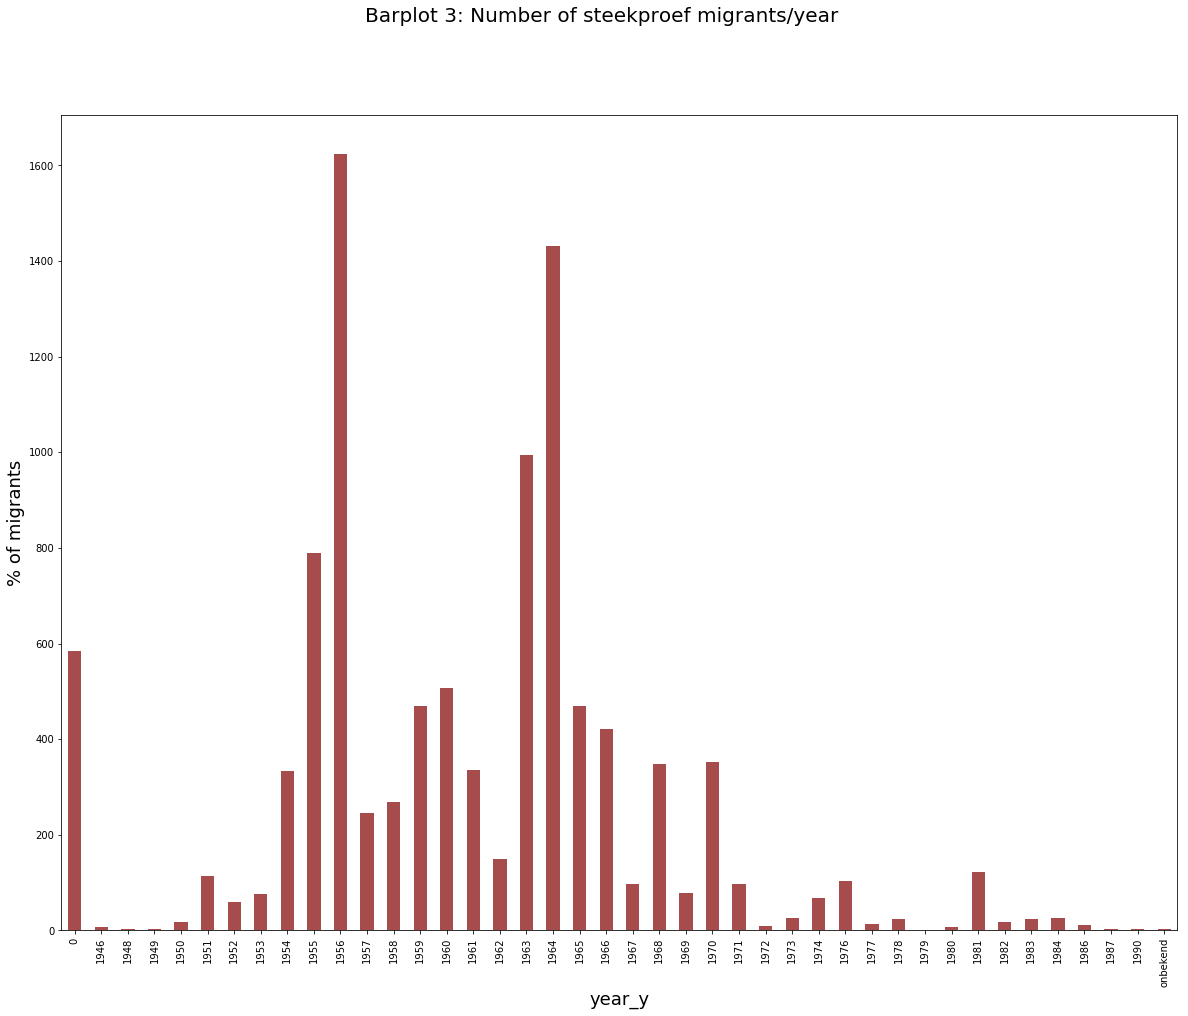

In [50]:
fig, ax = plt.subplots(figsize=(20,15)) 
fig.suptitle("Barplot 3: Number of steekproef migrants/year", fontsize=20)
ax.set_xlabel('xlabel', fontsize=18)
ax.set_ylabel('% of migrants', fontsize=18)

ax = edf.migrant.plot(kind="bar", color='maroon', alpha=0.7)

#this is roughly the same distribution as the images
# Note: there are quite a number of images without year. Have they been corrected elsewhere in the sample???

In [51]:
#TODO compare this with results of year_y
event_df = pd.pivot_table(extended_events, values=['subject'], index=extended_events.year_x, aggfunc='count')
event_df['%_yrx'] = (event_df.subject/ event_df.subject.sum() * 100).round(decimals=1)
event_dfy = pd.pivot_table(extended_events, values=['subject'], index=extended_events.year_y, aggfunc='count')
event_df['%_yry'] = (event_dfy.subject/ event_dfy.subject.sum() * 100).round(decimals=1)
event_df.head(103)

,subject,%_yrx,%_yry
year_x,,,
0,20,0.2,5.5
1655,1,0.0,NaN
1656,9,0.1,NaN
1950,2,0.0,0.2
1951,5,0.0,1.1
1952,9,0.1,0.6
1953,23,0.2,0.7
1954,155,1.5,3.2
1955,400,3.9,7.6


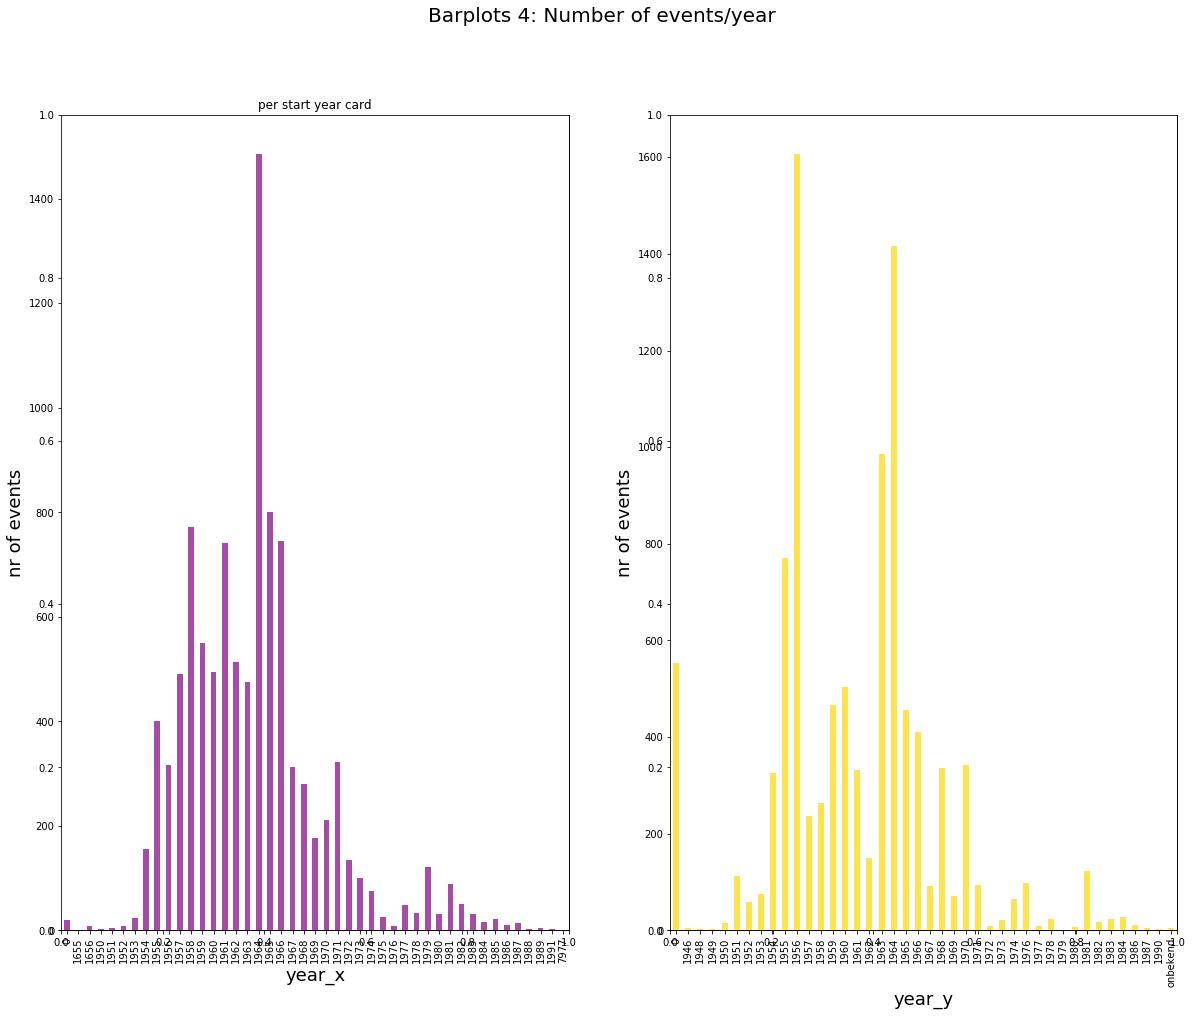

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,15))
ax1 = fig.add_subplot(121)
fig.suptitle("Barplots 4: Number of events/year", fontsize=20)
ax1.set_title('per event year card')
ax1.set_xlabel('xlabel', fontsize=18)
ax1.set_ylabel('nr of events', fontsize=18)
event_df['subject'].plot(kind="bar", color='purple', alpha=0.7, ax=ax1)

ax2 = fig.add_subplot(122)
ax1.set_title('per start year card')
ax2.set_xlabel('xlabel', fontsize=18)
ax2.set_ylabel('nr of events', fontsize=18)
event_dfy['subject'].plot(kind="bar", color='gold', alpha=0.7, ax=ax2)
#this is roughly the same distribution as the images
# Note: there are quite a number of images without year. Have they been corrected elsewhere in the sample???

## Analysis

This shows a graph with the number of sample migrant _events_ by the year they emigrated and the percentage.
Apart from the unassigned year (year = 0), 1957 and 1964 jump out with values, though there are still sizable numbers 
surrounding this, especially before 1957 and 1964
But let's compare this with the edges as the hypothesis was that the information density on the cards, of which the edges are supposed to be a measure correlate with the number of events.
Only after we have corroborated this statement, we can start analysing this further.

So what we have to do is first connect the edges to the sample (separately from the events). This requires some steps, as the spreadsheet is cut up into several sheets 

In [53]:
cards = steekproef.parse('emcards')
cards = cards.drop(cards.index[:2]) # drop legacy codings
cards = cards.drop(cards.columns[-3:], axis=1) # and trailing excel columns
cards.head()

,orig volgorde,kaartnummer,isStoredAt,jaartal_begin,jaartal_eind,referencesPerson,referencesCollective,is duplicaat,waardes tussen de duplicaten komen overeen
2,469,t_20180328_1,Sydney,1961,1966,38405,Melbourne,moet toegekend ontbreekt in masterdb,NaN
3,NaN,t_20180328_2,Melbourne,1962,1964,22345,Adelaide,NaN,NaN
4,NaN,t_20180328_3,melbourne,1968,1968,22766,Sydney,NaN,NaN
5,NaN,t_20180405_4,Melbourne,1956,1960,34973,Melbourne,NaN,NaN
6,366,76abc6fc-e8eb-102c-b6de-005056a23d00,Sydney,NaN,NaN,1,Sydney,NaN,NaN


In [54]:
images = steekproef.parse('emimages')
images = images.drop(images.columns[2:], axis=1) # kick out everything beyond kaart_nr, as they are Excel artefacts

images.head()

,im_nr,kaart_nr
0,1_0001,789d224e-e8eb-102c-b6de-005056a23d00
1,29_0031,76ac1a9e-e8eb-102c-b6de-005056a23d00
2,1_0201,789f164e-e8eb-102c-b6de-005056a23d00
3,1_0401,78a135b4-e8eb-102c-b6de-005056a23d00
4,1_0601,78a34e1c-e8eb-102c-b6de-005056a23d00


In [55]:
sampled_images = pd.merge(cards, images, left_on='kaartnummer', right_on='kaart_nr')
sampled_images.head()

,orig volgorde,kaartnummer,isStoredAt,jaartal_begin,jaartal_eind,referencesPerson,referencesCollective,is duplicaat,waardes tussen de duplicaten komen overeen,im_nr,kaart_nr
0,469,t_20180328_1,Sydney,1961,1966,38405,Melbourne,moet toegekend ontbreekt in masterdb,NaN,35_1201,t_20180328_1
1,NaN,t_20180328_2,Melbourne,1962,1964,22345,Adelaide,NaN,NaN,26_0423,t_20180328_2
2,NaN,t_20180328_3,melbourne,1968,1968,22766,Sydney,NaN,NaN,26_0043,t_20180328_3
3,NaN,t_20180405_4,Melbourne,1956,1960,34973,Melbourne,NaN,NaN,11_0003,t_20180405_4
4,366,76abc6fc-e8eb-102c-b6de-005056a23d00,Sydney,NaN,NaN,1,Sydney,NaN,NaN,29_0001,76abc6fc-e8eb-102c-b6de-005056a23d00


In [56]:
import csv 
import os
flin = open("/Users/rikhoekstra/surfdrive/emigratie/alledgesplus.csv")
infl = csv.DictReader(flin)
edges = [r for r in infl]

for r in edges:
    r['imnr'] = os.path.splitext(r['image'])[0].split('_')[-1]
    
nedges = pd.DataFrame.from_records(edges)
nedges.head()

,edges,image,imnr,map
0,1152,NL-HaNA_2.05.159_1_0191.jpg,0191,1
1,1276,NL-HaNA_2.05.159_1_1329.jpg,1329,1
2,784,NL-HaNA_2.05.159_1_0181.jpg,0181,1
3,2453,NL-HaNA_2.05.159_1_2221.jpg,2221,1
4,1277,NL-HaNA_2.05.159_1_1912.jpg,1912,1


In [69]:
# we (at least I) need a round trip to dictionary to make this work
csvims = images.to_dict('records')
for r in csvims:
    bak, imnm = r['im_nr'].split('_')
    r['imnm'] = imnm
    r['map'] = bak
nimages = pd.DataFrame.from_records(csvims)
nimages.head()

# and merge frames

im_edges = pd.merge(nimages, nedges, left_on=['map', 'imnm'], right_on=['map', 'imnr'])

#im_edges.to_csv('csvs/sample_images.csv', sep='\t') #just save once for further reference
im_edges.head()

,im_nr,imnm,kaart_nr,map,edges,image,imnr
0,1_0001,0001,789d224e-e8eb-102c-b6de-005056a23d00,1,1242,NL-HaNA_2.05.159_1_0001.jpg,0001
1,29_0031,0031,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1876,NL-HaNA_2.05.159_29_0031.jpg,0031
2,1_0201,0201,789f164e-e8eb-102c-b6de-005056a23d00,1,1620,NL-HaNA_2.05.159_1_0201.jpg,0201
3,1_0401,0401,78a135b4-e8eb-102c-b6de-005056a23d00,1,861,NL-HaNA_2.05.159_1_0401.jpg,0401
4,1_0601,0601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,1322,NL-HaNA_2.05.159_1_0601.jpg,0601


In [68]:
sampled_edges = pd.merge(cards, im_edges, left_on='kaartnummer', right_on='kaart_nr')
sampled_edges['edges'] = pd.to_numeric(sampled_edges['edges'])
#sampled_edges.to_csv('csvs/sampled_edges.csv', sep='\t')
sampled_edges.head()

,orig volgorde,kaartnummer,isStoredAt,jaartal_begin,jaartal_eind,referencesPerson,referencesCollective,is duplicaat,waardes tussen de duplicaten komen overeen,im_nr,imnm,kaart_nr,map,edges,image,imnr
0,469,t_20180328_1,Sydney,1961,1966,38405,Melbourne,moet toegekend ontbreekt in masterdb,NaN,35_1201,1201,t_20180328_1,35,2099,NL-HaNA_2.05.159_35_1201.jpg,1201
1,NaN,t_20180328_2,Melbourne,1962,1964,22345,Adelaide,NaN,NaN,26_0423,0423,t_20180328_2,26,3954,NL-HaNA_2.05.159_26_0423.jpg,0423
2,NaN,t_20180328_3,melbourne,1968,1968,22766,Sydney,NaN,NaN,26_0043,0043,t_20180328_3,26,1500,NL-HaNA_2.05.159_26_0043.jpg,0043
3,NaN,t_20180405_4,Melbourne,1956,1960,34973,Melbourne,NaN,NaN,11_0003,0003,t_20180405_4,11,3326,NL-HaNA_2.05.159_11_0003.jpg,0003
4,366,76abc6fc-e8eb-102c-b6de-005056a23d00,Sydney,NaN,NaN,1,Sydney,NaN,NaN,29_0001,0001,76abc6fc-e8eb-102c-b6de-005056a23d00,29,921,NL-HaNA_2.05.159_29_0001.jpg,0001


In [61]:
pivotted_sedges = pd.pivot_table(sampled_edges, index=['jaartal_begin'], values=['edges'], aggfunc='mean')
pivotted_sedges.head()

,edges
jaartal_begin,
0,1070.409091
1950,583.000000
1951,850.000000
1952,1468.500000
1953,1134.285714


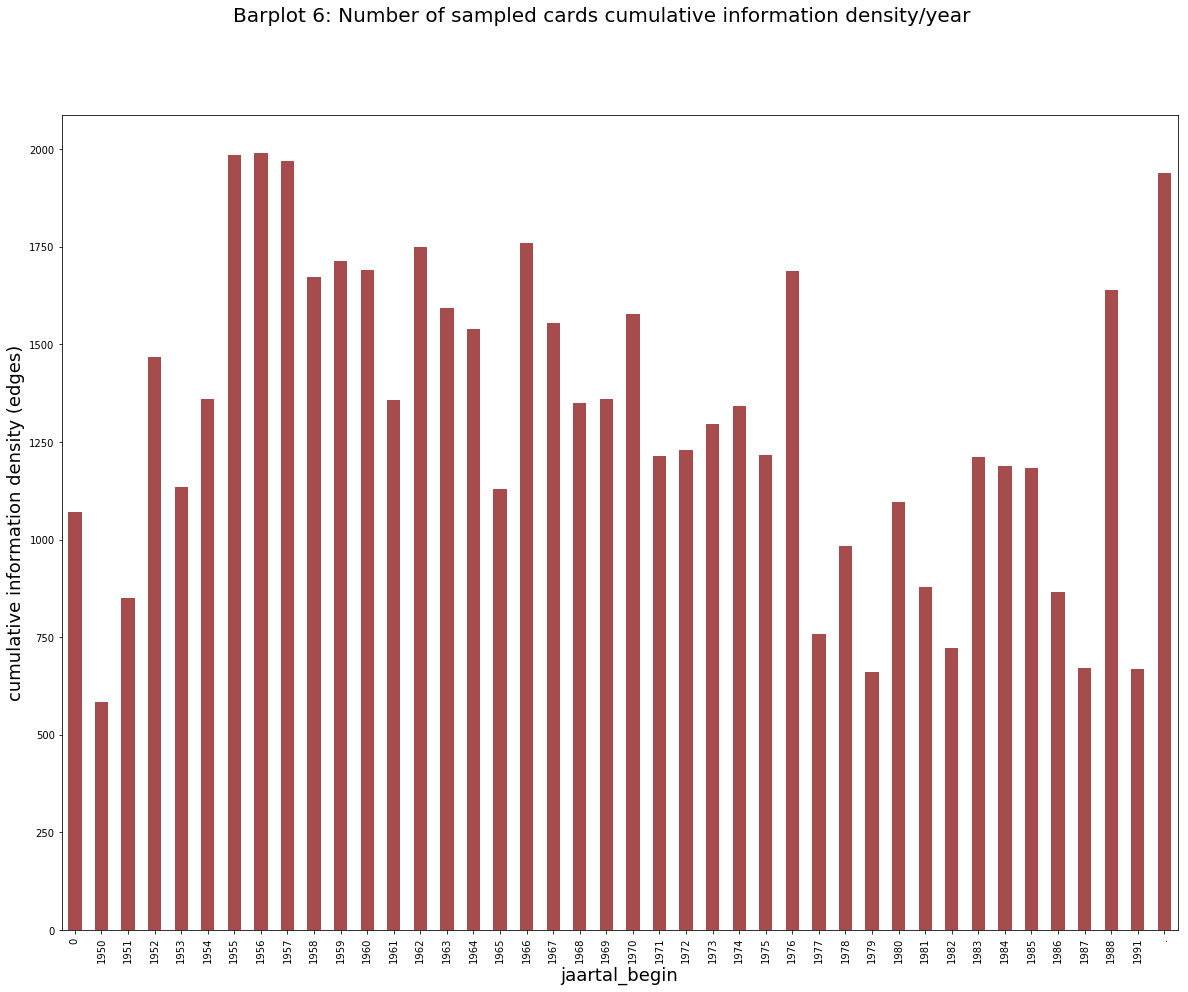

In [62]:
fig, ax = plt.subplots(figsize=(20,15)) 
fig.suptitle("Barplot 6: Number of sampled cards cumulative information density/year", fontsize=20)
ax.set_xlabel('xlabel', fontsize=18)
ax.set_ylabel('cumulative information density (edges)', fontsize=18)

ax = pivotted_sedges.edges.plot(kind="bar", color='maroon', alpha=0.7)

In [63]:
pivotted_sedges2 = pd.pivot_table(sampled_edges, index=['jaartal_begin'], values=['edges'], aggfunc='sum')
pivotted_sedges2.head()

,edges
jaartal_begin,
0,23549
1950,583
1951,850
1952,2937
1953,7940


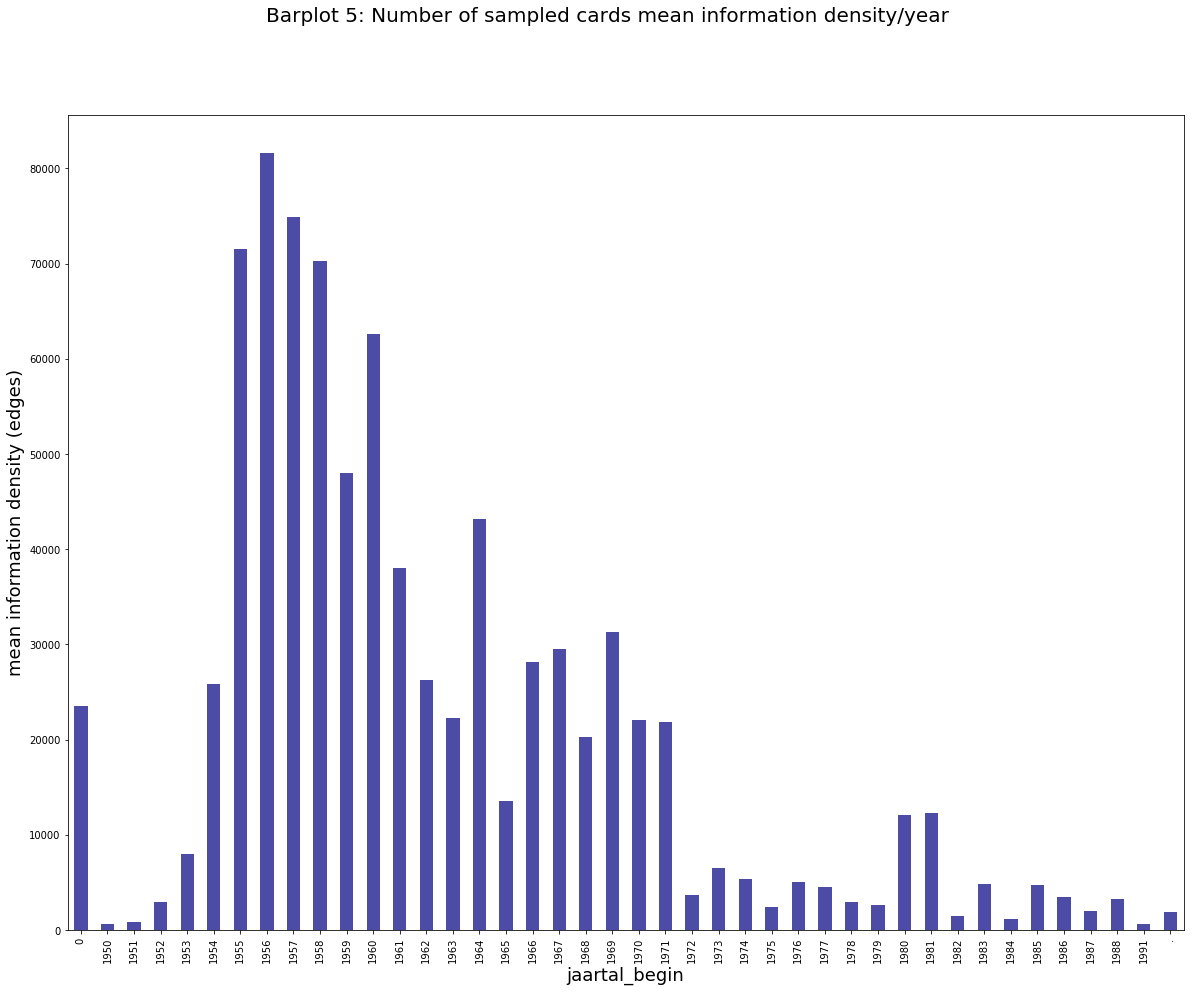

In [64]:
fig, ax = plt.subplots(figsize=(20,15)) 
fig.suptitle("Barplot 5: Number of sampled cards mean information density/year", fontsize=20)
ax.set_xlabel('xlabel', fontsize=18)
ax.set_ylabel('mean information density (edges)', fontsize=18)

ax = pivotted_sedges2.edges.plot(kind="bar", color='navy', alpha=0.7)

In [65]:
#for curiosity also the median (meaning the most typical card from that year)
pivotted_sedges3 = pd.pivot_table(sampled_edges, index=['jaartal_begin'], values=['edges'], aggfunc='median')
pivotted_sedges2.head()

,edges
jaartal_begin,
0,23549
1950,583
1951,850
1952,2937
1953,7940


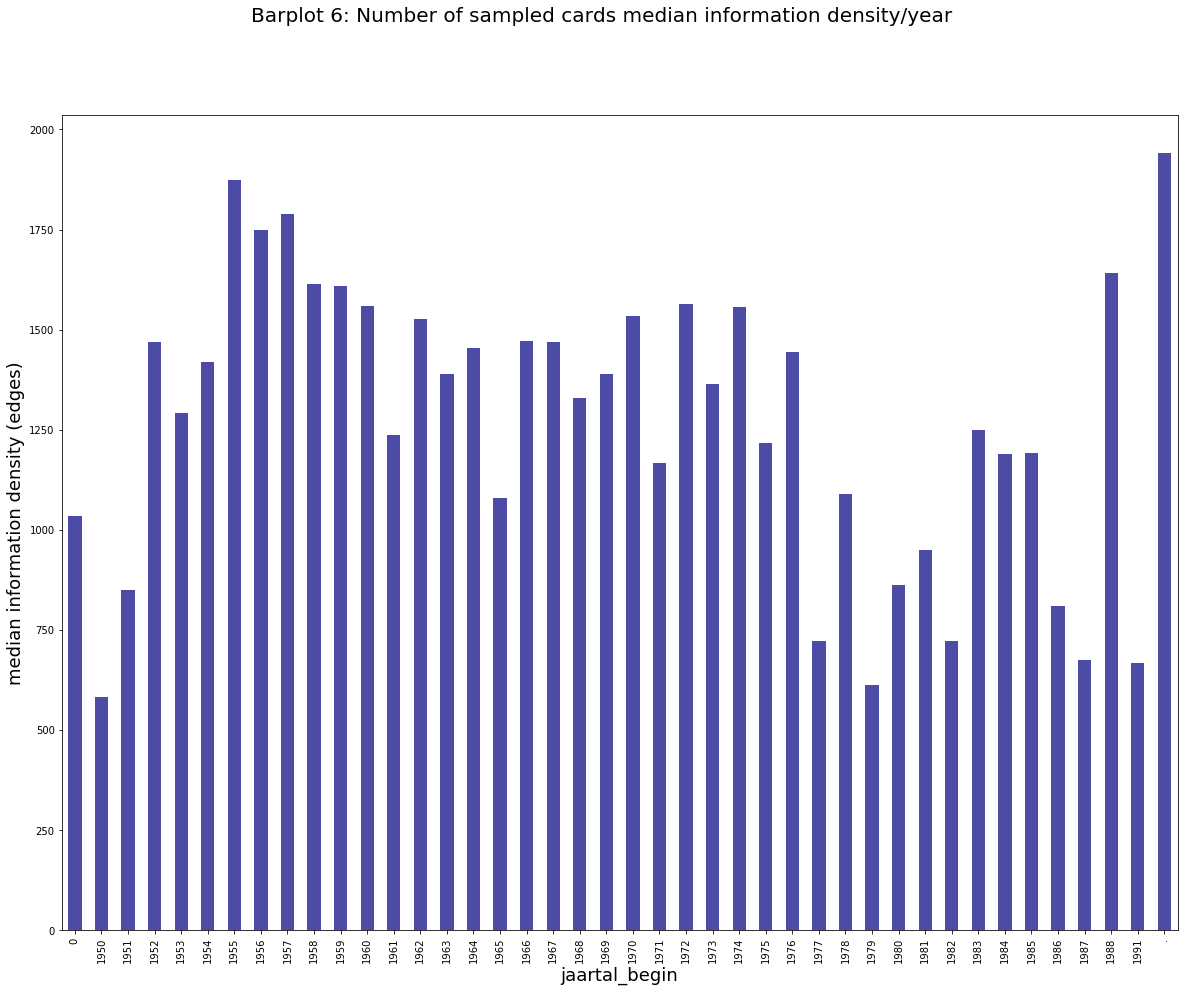

In [66]:
fig, ax = plt.subplots(figsize=(20,15)) 
fig.suptitle("Barplot 6: Number of sampled cards median information density/year", fontsize=20)
ax.set_xlabel('xlabel', fontsize=18)
ax.set_ylabel('median information density (edges)', fontsize=18)

ax = pivotted_sedges3.edges.plot(kind="bar", color='navy', alpha=0.7)

## Analysis

Note that the x-axis shifted in comparison with the edges of the complete population of cards (_barplot 2_ above), but that the general trend between the sample and the full population coincides.

Now we compare the edges with the number of events. We expect this to coincide with the number of edges, as the events are extracted from the cards, but we have two independent measures of the information density that was axiomatic.

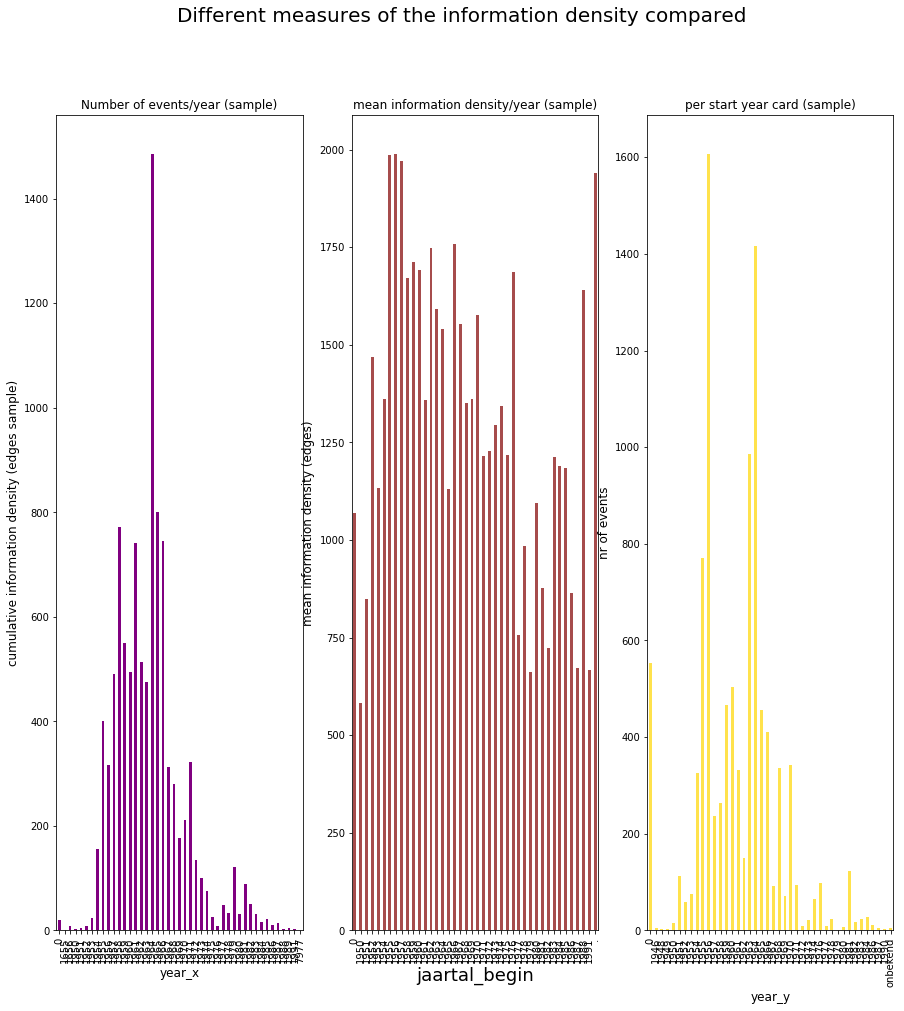

In [67]:
fig = plt.figure(figsize=(15,15))
fig.suptitle("Different measures of the information density compared",fontsize=20)
ax1 = fig.add_subplot(131)
ax1.set_xlabel('xlabel', fontsize=12)
ax1.set_ylabel('cumulative information density (edges sample)', fontsize=12)
ax1.set_title("Number of events/year (sample)")
event_df['subject'].plot(kind="bar", color='purple', ax=ax1)

ax2 = fig.add_subplot(132)
ax2.set_xlabel('xlabel', fontsize=18)
ax2.set_ylabel('mean information density (edges)', fontsize=12)
ax2.set_title("mean information density/year (sample)", fontsize=12)
pivotted_sedges.edges.plot(kind="bar", color='maroon', alpha=0.7, ax=ax2)

ax3 = fig.add_subplot(133)
ax3.set_title('per start year card (sample)')
ax3.set_xlabel('xlabel', fontsize=12)
ax3.set_ylabel('nr of events', fontsize=12)
event_dfy['subject'].plot(kind="bar", color='gold', alpha=0.7, ax=ax3)


## Analysis

Barplots 5 and 6 were both made with only the edges data for the images from the sample.
Comparing barplots 4, 5 and 6 shows that there is a rough, but not a precise correspondence between the number of events (_barplot 4_) and either information density on the cards, measured as the mean number of edges (_barplot 4_)  (_barplot 5_). 


At first it was hard to judge what is going on:

* but perhaps the relation between the number of events and the information density is also influenced by the extensiveness of writing: not all events are described in the same number of words. 
* In addition, part of the writing on the cards is about other information than events, such as formal data and adresses and these are reflected in the edges, but not in the events. That could be the reason that the events show a somewhat exaggerated picture of the information on the cards. 
* But than i realize that something else to take into consideration is that events spread out over (sometimes) many years while the information density is tied to the starting year (the migration date) of the cards. 
* Thinking about this some more, there are a number of different measures. _First_ the dates: there is a migration date, the only date available in the database and on the 'card level'. Then there are the event date, that start _after_ the migration date when there is a first interaction between the consulate keeping the card and the migrant in question. The events go on for an indefinite number of years. We are actually looking at very different things here, but it is clear that the written recording of the events are reflected in the information density of the written text on the card. _Second_: we measure quite different things. With the events, we measure the number of recorded interactions between the consulate(s) and the migrant involved. The edges measure the information density on the cards, that is mainly but not exclusively determined by the interaction with the consulate. For a given year, the number of information density can be measured by the accumulated density of the cards, that is all edges added, or the mean density of the cards. The accumulated density is more appropriate as it is independent of the number of cards (or at least mostly). However it also has the effect of softening the extremes. For a measure of the general trend, this is the best idea. Perhaps this should also be computed for the events, but for now that is too much work.

__TODO__ I changed this comparing all distributions and they all differ somewhat.
But the differences are intriguing and worth exploring in more detail.

